In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle
import matplotlib

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_singlenode
import scipy

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

# We define colors for later convenience
color_x = 'red'
color_y = 'blue'
fs_=16
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = fs_
plt.rcParams["axes.labelsize"] = fs_
matplotlib.rc('xtick', labelsize=fs_) 
matplotlib.rc('ytick', labelsize=fs_) 
plt.rc('legend',fontsize=fs_)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def plot_single(time, state, control, target, filename=None):

    fig, ax = plt.subplots(2,1)

    ax[0].plot(time, state[0,0,1:], color="red")
    ax[0].plot(time, state[0,1,1:], color="blue")
    ax[0].plot(time, target[0,0,1:], color="red", linestyle=':')
    ax[0].plot(time, target[0,1,1:], color="blue", linestyle=':')
    #ax[0].set_xlim(0,300)

    ax[1].plot(time, control[0,0,1:], color="red")
    ax[1].plot(time, control[0,1,1:], color="blue")
    #ax[1].set_xlim(0,300)

    if type(filename) != type(None):
        plt.savefig(filename)
    plt.show()

savepath =  '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep + 'paper2_chaos' + os.sep + 'exploration' + os.sep + 'images_ops' + os.sep

def plot(c_array, filename):

    fig, ax = plt.subplots(len(c_array),1, figsize=(10,2.*len(c_array)))

    for i in range(len(c_array)):
        ax[i].plot(wc_controlled.model.t, c_array[i][0,0,1:], color="red")
        ax[i].plot(wc_controlled.model.t, c_array[i][0,1,1:], color="blue")
        ax[i].set_ylim([-0.4,0.4])
        ax[i].set_title(str(np.round(i*2./(len(c_array)-1), 2))+ " * pi")
        if i != len(c_array)-1:
            ax[i].set_xticklabels([])

    plt.savefig(os.path.join(savepath, filename))
    plt.show()

period =  18.900000000000002
peaks =  [ 109  297  485  674  863 1052 1241 1430 1619 1808 1997 2186 2375 2564
 2753 2942 3131 3320 3509 3698 3887]
minima =  [  17  198  386  575  764  953 1142 1331 1520 1709 1898 2087 2276 2465
 2654 2843 3032 3220 3409 3598 3787 3976]
peaks =  [  57  245  433  622  811 1000 1189 1378 1567 1756 1945 2134 2323 2512
 2701 2890 3079 3268 3457 3646 3835]
minima =  [  56  244  433  622  811 1000 1189 1378 1567 1756 1945 2134 2323 2512
 2701 2890 3078 3267 3456 3645 3834]


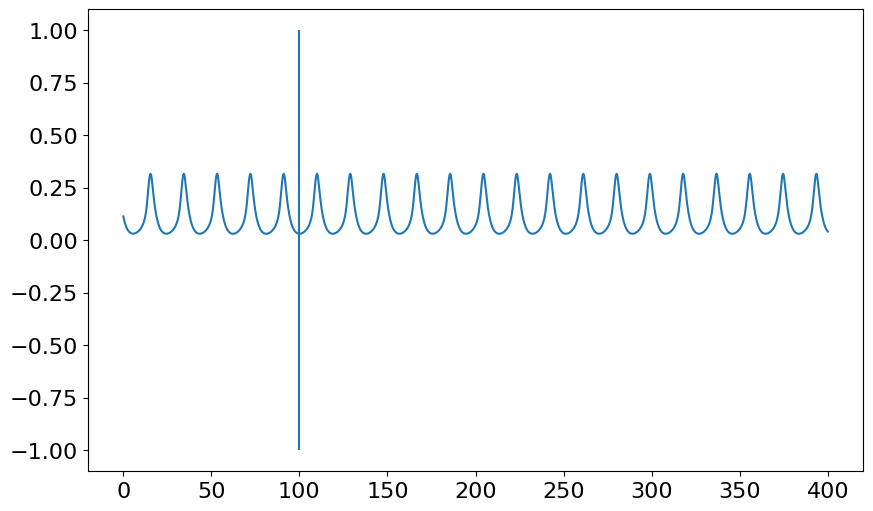

In [12]:
wc = WCModel()
wc.params.sigma_ou = 0.

dt = 0.1
wc.params.dt = dt

duration = 400.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control =np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]
input = zero_control.copy()

wc.params["duration"] = duration
x_init = 0.045135938287846025
y_init = 0.08586538415443892
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])

wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

wc.run()

peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
period = (peaks[-1] - peaks[-2])*dt
print("period = ", period)

wc.run()
peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
print("peaks = ", peaks)
init_peak = [wc.exc[0,51], wc.inh[0,51]]

mins = scipy.signal.find_peaks(-wc.exc[0,:])[0]
print("minima = ", mins)
init_min = [wc.exc[0,141], wc.inh[0,141]]

wc.params["exc_init"] = np.array([[init_peak[0]]])
wc.params["inh_init"] = np.array([[init_peak[1]]])
wc.run()
target_peak = np.concatenate((np.concatenate( (wc.params["exc_init"], wc.params["inh_init"]), axis=1)[:,:, np.newaxis], np.stack( (wc.exc, wc.inh), axis=1)), axis=2)

peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
print("peaks = ", peaks)

wc.params["exc_init"] = np.array([[init_min[0]]])
wc.params["inh_init"] = np.array([[init_min[1]]])
wc.run()
target_min = np.concatenate((np.concatenate( (wc.params["exc_init"], wc.params["inh_init"]), axis=1)[:,:, np.newaxis], np.stack( (wc.exc, wc.inh), axis=1)), axis=2)

mins = scipy.signal.find_peaks(-wc.exc[0,:])[0]
print("minima = ", mins)

plt.plot(wc.t, wc.exc[0,:])
plt.vlines(100,-1,1)
plt.show()

In [13]:
control_mat = np.zeros( (wc.params.N, len(wc.state_vars)) )
control_mat[0,0] = 1.
control_mat[0,1] = 1.

prec_mat = np.zeros( (wc.params.N, len(wc.output_vars)) )
prec_mat[0,0] = 1.
prec_mat[0,1] = 1.

int0, int1 = 1000, None

duration = 300.
wc.params["duration"] = duration
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control =np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]

wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

In [118]:
def increase_step_compute():
    wc_controlled.step = 1e-2
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e0
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(1000)

    return

def get_values(results_dict, iw, ish, w1):
    results_dict["control"][iw][ish] = wc_controlled.control.copy()
    results_dict["state"][iw][ish] = wc_controlled.get_xs().copy()
    results_dict["total_cost"][iw][ish] = wc_controlled.cost_history.copy()

    wc_controlled.w_1D = 0.
    wc_controlled.simulate_forward()
    results_dict["precision_cost"][iw][ish] = wc_controlled.compute_total_cost()
    results_dict["L1_cost_weighted"][iw][ish] = ( results_dict["total_cost"][iw][ish][-1] - results_dict["precision_cost"][iw][ish]) 
    results_dict["L1_cost_unweighted"][iw][ish] = results_dict["L1_cost_weighted"][iw][ish] / w1
    wc_controlled.w_1D = w1

    return

def get_period_index_target(period, i_sh, n_points, target_in):
    p = i_sh* 2.* np.pi / (n_points-1)
    index = np.round(p * period/ ( 2. * np.pi)/ dt).astype(int)
    target = target_in[:,:,index:index+np.round(1+duration/dt,1).astype(int)]
    return p, index, target

In [14]:
n_points = 41
w_array = [0.125, .25, 0.5, 1., 2., 4., 8.]
none_array = [[None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points ]
file_array = ["0-125_min_w1.png", "0-25_min_w1.png", "0-5_min_w1.png", "1_min_w1.png", "2_min_w1.png", "4_min_w1.png", "8_min_w1.png"]

results_min = dict([
    ('w1', w_array),
    ('models', [[None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points ]),
    ("total_cost", [[None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points ]),
    ("precision_cost", [[None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points ]),
    ("L1_cost_unweighted", [[None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points ]),
    ("L1_cost_weighted", [[None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points ]),
    ("control", [[None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points ]),
    ("state", [[None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points, [None] * n_points ]),
    ("filename", file_array)
    ])

In [128]:
wc.params["exc_init"] = np.array([[init_min[0]]])
wc.params["inh_init"] = np.array([[init_min[1]]])

ind_list = []
options = [False, False, False, False, True, True]

for i_w in range(len(results_min["w1"])):

    if i_w not in [1]:    ## 1 done, 2 todo
        continue

    w1 = results_min['w1'][i_w]

    for i_shift in range(n_points):

        break

        period_shift, index_shift, target_shift = get_period_index_target(period, i_shift, n_points, target_min)

        wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=0., w_1D=w1, print_array=np.arange(0,2001,200), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)
        results_min["models"][i_w][i_shift] = wc_controlled

        wc_controlled.step = 1e-3
        wc_controlled.optimize(100)

        if i_shift in [0, n_points-1]:
            get_values(results_min, i_w, i_shift, w1)
            continue

        increase_step_compute()
        get_values(results_min, i_w, i_shift, w1)

    if options[0]:
        for i_shift in range(2, n_points-1):

            period_shift, index_shift, target_shift = get_period_index_target(period, i_shift, n_points, target_min)
            wc_controlled = results_min["models"][i_w][i_shift]
            
            factor = 1.05
            if i_shift > n_points/2:
                factor = 1.
            
            wc_controlled.control = results_min["control"][i_w][i_shift-1].copy() * factor
            wc_controlled.update_input()

            wc_controlled.step = 1e-3
            wc_controlled.zero_step_encountered = False
            wc_controlled.optimize(200)

            increase_step_compute()

            if wc_controlled.cost_history[-1] < results_min["total_cost"][i_w][i_shift][-1]:
                print("-----------------------------------------------")
                print("0 found better solution, ", i_shift)

                get_values(results_min, i_w, i_shift, w1)

    if options[1]:
        for i_shift in range(n_points-3, 0, -1):

            period_shift, index_shift, target_shift = get_period_index_target(period, i_shift, n_points, target_min)
            wc_controlled = results_min["models"][i_w][i_shift]

            factor = 1.05
            if i_shift < n_points/2:
                factor = 1.
            
            wc_controlled.control = results_min["control"][i_w][i_shift+1].copy() * factor
            wc_controlled.update_input()
            wc_controlled.simulate_forward()

            increase_step_compute()

            if wc_controlled.cost_history[-1] < results_min["total_cost"][i_w][i_shift][-1]:
                print("-----------------------------------------------")
                print("1 found better solution, ", i_shift)

                get_values(results_min, i_w, i_shift, w1)

    if options[2] and i_w > 0:
        for i_shift in range(1, n_points-1):

            period_shift, index_shift, target_shift = get_period_index_target(period, i_shift, n_points, target_min)
            wc_controlled = results_min["models"][i_w][i_shift]
                        
            wc_controlled.control = results_min["control"][i_w-1][i_shift].copy() * 1.01
            wc_controlled.update_input()

            wc_controlled.step = 1e-3
            wc_controlled.zero_step_encountered = False
            wc_controlled.optimize(200)

            increase_step_compute()

            if wc_controlled.cost_history[-1] < results_min["total_cost"][i_w][i_shift][-1]:
                print("-----------------------------------------------")
                print("2 found better solution, ", i_shift)

                get_values(results_min, i_w, i_shift, w1)

    if options[3] and i_w != len(results_min["w1"]) - 1:
        for i_shift in range(1, n_points-1):

            period_shift, index_shift, target_shift = get_period_index_target(period, i_shift, n_points, target_min)
            wc_controlled = results_min["models"][i_w][i_shift]
            
            wc_controlled.control = results_min["control"][i_w+1][i_shift].copy() * 1.
            wc_controlled.update_input()

            wc_controlled.step = 1e-3
            wc_controlled.zero_step_encountered = False
            wc_controlled.optimize(200)

            increase_step_compute()

            if wc_controlled.cost_history[-1] < results_min["total_cost"][i_w][i_shift][-1]:
                print("-----------------------------------------------")
                print("3 found better solution, ", i_shift)

                get_values(results_min, i_w, i_shift, w1)

    if options[4]:
        for i_shift in range(1, n_points-1):

            period_shift, index_shift, target_shift = get_period_index_target(period, i_shift, n_points, target_min)
            wc_controlled = results_min["models"][i_w][i_shift]
            
            wc_controlled.control = results_min["control"][i_w][i_shift-1].copy() * 1.01
            wc_controlled.control[0,0,1500:] = 0.
            wc_controlled.update_input()

            wc_controlled.step = 1e-3
            wc_controlled.zero_step_encountered = False
            wc_controlled.optimize(200)

            increase_step_compute()

            if wc_controlled.cost_history[-1] < results_min["total_cost"][i_w][i_shift][-1]:
                print("-----------------------------------------------")
                print("4 found better solution, ", i_shift)

                get_values(results_min, i_w, i_shift, w1)

    if options[5]:
        for i_shift in range(1, n_points-1):

            period_shift, index_shift, target_shift = get_period_index_target(period, i_shift, n_points, target_min)
            wc_controlled = results_min["models"][i_w][i_shift]
            
            wc_controlled.control = results_min["control"][i_w][i_shift-1].copy() * 1.01
            wc_controlled.control[0,1,:] = 0.
            wc_controlled.update_input()

            wc_controlled.step = 1e-3
            wc_controlled.zero_step_encountered = False
            wc_controlled.optimize(200)

            increase_step_compute()

            if wc_controlled.cost_history[-1] < results_min["total_cost"][i_w][i_shift][-1]:
                print("-----------------------------------------------")
                print("5 found better solution, ", i_shift)

                get_values(results_min, i_w, i_shift, w1)
            
    # plot(results_min["control"][i_w], results_min["filename"][i_w])
    save(results_min)

Compute control for a deterministic system
Cost in iteration 0: 0.08847463141830969
Cost in iteration 100: 0.018924711185870503
Converged in iteration 198 with cost 0.017122328049927762
Final cost : 0.017122328049927762
Compute control for a deterministic system
Cost in iteration 0: 0.017122328049927762
Converged in iteration 1 with cost 0.017122328049927762
Final cost : 0.017122328049927762
Compute control for a deterministic system
Cost in iteration 0: 0.017122328049927762
Converged in iteration 1 with cost 0.017122328049927762
Final cost : 0.017122328049927762
Compute control for a deterministic system
Cost in iteration 0: 0.017122328049927762
Converged in iteration 1 with cost 0.017122328049927762
Final cost : 0.017122328049927762
Compute control for a deterministic system
Cost in iteration 0: 0.017122328049927762
Converged in iteration 1 with cost 0.017122328049927762
Final cost : 0.017122328049927762
Compute control for a deterministic system
Cost in iteration 0: 0.07677634382965

In [114]:
def save(results_dict):
    filehandler = open("results_min_w1.pickle","wb")
    pickle.dump(results_dict,filehandler)
    filehandler.close()

def read():
    filehandler = open("results_min_w1.pickle","rb")
    results_dict = pickle.load(filehandler)
    filehandler.close()

    return results_dict